# EDA (Exploratory Data Analysis)

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# loading data
df = pd.read_csv('J3.csv')
pd.DataFrame(df)

,Indikator,Tipe
0,hal yang bisa dilakukan ialah memberi solusi y...,F
1,Menegeaskan bahwa ia tetap salah dan menyuruhn...,T
2,Jika memang dia yang bersalah ya harus terima ...,T
3,menegaskan jika memang dia salah dan turut mem...,T
4,Sebagai sahabatnya tentu saya akan mencoba men...,T
...,...,...
100,saya akan membantunya mencari solusi dan meneg...,F
101,Menyuruhnya untuk menerima konsekuensinya atas...,T
102,saya menegaskan bahwa ia tetap salah tapi saya...,T
103,membantu untuk menyelesaikan masalah dengan me...,F


In [ ]:
#  memeriksa missing value
df.isnull().sum()

Indikator    0
Tipe         0
dtype: int64

In [ ]:
df.describe(include=['object'])

,Indikator,Tipe
count,105,105
unique,105,2
top,hal yang bisa dilakukan ialah memberi solusi y...,F
freq,1,55


In [ ]:
total = df.groupby(['Tipe']).count()
total

,Indikator
Tipe,
F,55
T,50


In [ ]:
#Mencari kata terumum pada kolom indikator
from collections import Counter

words = list(df["Indikator"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(100)

[('saya', 75),
 ('dan', 63),
 ('akan', 63),
 ('solusi', 49),
 ('dia', 45),
 ('untuk', 44),
 ('salah', 36),
 ('ia', 34),
 ('mencari', 33),
 ('menerima', 30),
 ('yang', 29),
 ('tidak', 26),
 ('tetap', 24),
 ('bahwa', 23),
 ('konsekuensinya', 21),
 ('harus', 20),
 ('jika', 20),
 ('Saya', 19),
 ('menegaskan', 18),
 ('memberi', 13),
 ('membantu', 13),
 ('kesalahan', 13),
 ('masalah', 11),
 ('tetapi', 11),
 ('agar', 11),
 ('itu', 11),
 ('menyuruhnya', 10),
 ('memang', 10),
 ('membantunya', 10),
 ('sahabat', 9),
 ('salah,', 9),
 ('memberikan', 9),
 ('meskipun', 8),
 ('dengan', 8),
 ('maka', 8),
 ('kalau', 8),
 ('karena', 8),
 ('konsekuensi', 8),
 ('baik', 8),
 ('bisa', 7),
 ('nya', 7),
 ('kesalahannya', 7),
 ('juga', 7),
 ('berusaha', 7),
 ('menyelesaikan', 7),
 ('konflik', 6),
 ('namun', 6),
 ('di', 6),
 ('teman', 6),
 ('ada', 6),
 ('dalam', 6),
 ('menyuruh', 6),
 ('dapat', 5),
 ('tersebut', 5),
 ('tapi', 5),
 ('ini', 5),
 ('dari', 5),
 ('Menegaskan', 5),
 ('atau', 5),
 ('menasehati', 5),
 (

#Data Pre-processing

1. Case Folding
2. Data Cleansing
- Case folding
- Stripping
- Remove emoji
- Remove number
- Remove character
- Remove punctiation
- Remove single char
3. Tokenizing
4. Normalization
5. Filtering
6. Stemming

In [ ]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df['Indikator'] = df['Indikator'].str.lower()
pd.DataFrame(df['Indikator'])

,Indikator
0,hal yang bisa dilakukan ialah memberi solusi y...
1,menegeaskan bahwa ia tetap salah dan menyuruhn...
2,jika memang dia yang bersalah ya harus terima ...
3,menegaskan jika memang dia salah dan turut mem...
4,sebagai sahabatnya tentu saya akan mencoba men...
...,...
100,saya akan membantunya mencari solusi dan meneg...
101,menyuruhnya untuk menerima konsekuensinya atas...
102,saya menegaskan bahwa ia tetap salah tapi saya...
103,membantu untuk menyelesaikan masalah dengan me...


In [ ]:
# data cleansing
from IPython.utils import text
import string
import re #regex library

# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def data_clean(indikator) :
  #remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  #remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  #remove number
  indikator = re.sub(r"\d+", "", indikator)
  #remove punctuation
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  #remove whitespace leading & trailing
  indikator =  indikator.strip()
  #remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  #remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator
df['Indikator_clean'] = df['Indikator'].apply(data_clean)
  #NLTK word tokenize
def word_tokenize_wrapper(indikator) :
  return word_tokenize(indikator)

df['Indikator_tokens'] = df['Indikator_clean'].apply(word_tokenize_wrapper)

pd.DataFrame(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Indikator,Tipe,Indikator_clean,Indikator_tokens
0,hal yang bisa dilakukan ialah memberi solusi y...,F,hal yang bisa dilakukan ialah memberi solusi y...,"[hal, yang, bisa, dilakukan, ialah, memberi, s..."
1,menegeaskan bahwa ia tetap salah dan menyuruhn...,T,menegeaskan bahwa ia tetap salah dan menyuruhn...,"[menegeaskan, bahwa, ia, tetap, salah, dan, me..."
2,jika memang dia yang bersalah ya harus terima ...,T,jika memang dia yang bersalah ya harus terima ...,"[jika, memang, dia, yang, bersalah, ya, harus,..."
3,menegaskan jika memang dia salah dan turut mem...,T,menegaskan jika memang dia salah dan turut mem...,"[menegaskan, jika, memang, dia, salah, dan, tu..."
4,sebagai sahabatnya tentu saya akan mencoba men...,T,sebagai sahabatnya tentu saya akan mencoba men...,"[sebagai, sahabatnya, tentu, saya, akan, menco..."
...,...,...,...,...
100,saya akan membantunya mencari solusi dan meneg...,F,saya akan membantunya mencari solusi dan meneg...,"[saya, akan, membantunya, mencari, solusi, dan..."
101,menyuruhnya untuk menerima konsekuensinya atas...,T,menyuruhnya untuk menerima konsekuensinya atas...,"[menyuruhnya, untuk, menerima, konsekuensinya,..."
102,saya menegaskan bahwa ia tetap salah tapi saya...,T,saya menegaskan bahwa ia tetap salah tapi saya...,"[saya, menegaskan, bahwa, ia, tetap, salah, ta..."
103,membantu untuk menyelesaikan masalah dengan me...,F,membantu untuk menyelesaikan masalah dengan me...,"[membantu, untuk, menyelesaikan, masalah, deng..."


In [ ]:
normalizad_word = pd.read_csv("normalisasi1.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Indikator_normalized'] = df['Indikator_tokens'].apply(normalized_term)

df['Indikator_normalized'].head()

0    [hal, yang, bisa, dilakukan, ialah, memberi, s...
1    [menegeaskan, bahwa, ia, tetap, salah, dan, me...
2    [jika, memang, dia, yang, bersalah, iya, harus...
3    [menegaskan, jika, memang, dia, salah, dan, tu...
4    [sebagai, sahabatnya, tentu, saya, akan, menco...
Name: Indikator_normalized, dtype: object

In [ ]:
# # filtering
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')


# def stopword_removal (indikator):
#   filtering = stopwords.words('indonesian','english')
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
# df['indikator_filter'].head()

In [ ]:
# Membuat list stopword sesuai kebutuhan fitur berdasarkan most uninformative words
'''
Ketika ada PR yang harus diselesaikan malam ini, Tiba-tiba teman lamamu mengajak
kamu untuk bertemu (reuni,bermain, ngobrol). Bagaimana cara kamu menyikapinya? , ceritakan alasannya!
'''
stop_list = ["saya","akan","yang","dengan","di","jika"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
df['indikator_filter']

0      [hal, bisa, dilakukan, ialah, memberi, solusi,...
1      [menegeaskan, bahwa, ia, tetap, salah, dan, me...
2      [memang, dia, bersalah, iya, harus, terima, ko...
3      [menegaskan, memang, dia, salah, dan, turut, m...
4      [sebagai, sahabatnya, tentu, mencoba, mencari,...
                             ...                        
100    [membantunya, mencari, solusi, dan, menegaskan...
101    [menyuruhnya, untuk, menerima, konsekuensinya,...
102    [menegaskan, bahwa, ia, tetap, salah, tetapi, ...
103    [membantu, untuk, menyelesaikan, masalah, menc...
104    [membantu, masalahnya, biar, cepet, selesai, s...
Name: indikator_filter, Length: 105, dtype: object

In [ ]:
# Stemming

!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df['indikator_stemming'] = df['indikator_filter'].apply(stemming)

hal bisa laku ialah beri solusi mungkin dapat batu selesai nya konflik sebut meski sahabat salah namun cara tidak sakit hati
menegeaskan bahwa ia tetap salah dan suruh untuk terima konsekuensi
memang dia salah iya harus terima konsekuensi meski temen kita
tegas memang dia salah dan turut bantu mencau solusi untuk baik salah
bagai sahabat tentu coba cari solusi untuk masalah dia hadap tetapi salah nya fatal dan tidak bisa baik maka lepas
tegas kalau dia salah tetapi juga beri nasihat dan motivasi
jikalau ia salah tidak dia aku salahtapi kalau sudah egois dan tidak mau kalah buat apa dia saja tidak penting prasaan orang lainbuat apa kita erti asa dia woman support woman lagi pula teman bukan hanya dia saja dunia ini
bantu dan cari solusi tetapi tidak benar dia
sahabat libat konflik karena diri sendiri ia harus berani terima konsekuensi dan beri solusi bisa ia harus ajar dari konflik sebut agar tidak ulang salah sama
tegas bahwa dia memang salah dan ada konsekuensi memang harus dia terima

In [ ]:
#tokenize data stemming

 #NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

df['indikator_stemmed_tokens'] = df['indikator_stemming'].apply(stemmed_tokenizing)


In [ ]:
pd.DataFrame(df[['Indikator_normalized', 'indikator_filter', 'indikator_stemmed_tokens']])

,Indikator_normalized,indikator_filter,indikator_stemmed_tokens
0,"[hal, yang, bisa, dilakukan, ialah, memberi, s...","[hal, bisa, dilakukan, ialah, memberi, solusi,...","[hal, bisa, laku, ialah, beri, solusi, mungkin..."
1,"[menegeaskan, bahwa, ia, tetap, salah, dan, me...","[menegeaskan, bahwa, ia, tetap, salah, dan, me...","[menegeaskan, bahwa, ia, tetap, salah, dan, su..."
2,"[jika, memang, dia, yang, bersalah, iya, harus...","[memang, dia, bersalah, iya, harus, terima, ko...","[memang, dia, salah, iya, harus, terima, konse..."
3,"[menegaskan, jika, memang, dia, salah, dan, tu...","[menegaskan, memang, dia, salah, dan, turut, m...","[tegas, memang, dia, salah, dan, turut, bantu,..."
4,"[sebagai, sahabatnya, tentu, saya, akan, menco...","[sebagai, sahabatnya, tentu, mencoba, mencari,...","[bagai, sahabat, tentu, coba, cari, solusi, un..."
...,...,...,...
100,"[saya, akan, membantunya, mencari, solusi, dan...","[membantunya, mencari, solusi, dan, menegaskan...","[bantu, cari, solusi, dan, tegas, bahwa, dia, ..."
101,"[menyuruhnya, untuk, menerima, konsekuensinya,...","[menyuruhnya, untuk, menerima, konsekuensinya,...","[suruh, untuk, terima, konsekuensi, atas, sala..."
102,"[saya, menegaskan, bahwa, ia, tetap, salah, te...","[menegaskan, bahwa, ia, tetap, salah, tetapi, ...","[tegas, bahwa, ia, tetap, salah, tetapi, turut..."
103,"[membantu, untuk, menyelesaikan, masalah, deng...","[membantu, untuk, menyelesaikan, masalah, menc...","[bantu, untuk, selesai, masalah, cari, jalan, ..."


In [ ]:
df.head()

,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,hal yang bisa dilakukan ialah memberi solusi y...,F,hal yang bisa dilakukan ialah memberi solusi y...,"[hal, yang, bisa, dilakukan, ialah, memberi, s...","[hal, yang, bisa, dilakukan, ialah, memberi, s...","[hal, bisa, dilakukan, ialah, memberi, solusi,...",hal bisa laku ialah beri solusi mungkin dapat ...,"[hal, bisa, laku, ialah, beri, solusi, mungkin..."
1,menegeaskan bahwa ia tetap salah dan menyuruhn...,T,menegeaskan bahwa ia tetap salah dan menyuruhn...,"[menegeaskan, bahwa, ia, tetap, salah, dan, me...","[menegeaskan, bahwa, ia, tetap, salah, dan, me...","[menegeaskan, bahwa, ia, tetap, salah, dan, me...",menegeaskan bahwa ia tetap salah dan suruh unt...,"[menegeaskan, bahwa, ia, tetap, salah, dan, su..."
2,jika memang dia yang bersalah ya harus terima ...,T,jika memang dia yang bersalah ya harus terima ...,"[jika, memang, dia, yang, bersalah, ya, harus,...","[jika, memang, dia, yang, bersalah, iya, harus...","[memang, dia, bersalah, iya, harus, terima, ko...",memang dia salah iya harus terima konsekuensi ...,"[memang, dia, salah, iya, harus, terima, konse..."
3,menegaskan jika memang dia salah dan turut mem...,T,menegaskan jika memang dia salah dan turut mem...,"[menegaskan, jika, memang, dia, salah, dan, tu...","[menegaskan, jika, memang, dia, salah, dan, tu...","[menegaskan, memang, dia, salah, dan, turut, m...",tegas memang dia salah dan turut bantu mencau ...,"[tegas, memang, dia, salah, dan, turut, bantu,..."
4,sebagai sahabatnya tentu saya akan mencoba men...,T,sebagai sahabatnya tentu saya akan mencoba men...,"[sebagai, sahabatnya, tentu, saya, akan, menco...","[sebagai, sahabatnya, tentu, saya, akan, menco...","[sebagai, sahabatnya, tentu, mencoba, mencari,...",bagai sahabat tentu coba cari solusi untuk mas...,"[bagai, sahabat, tentu, coba, cari, solusi, un..."


# Feature extraction

In [ ]:
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data_clean = df.astype({'Tipe' : 'category'})
data_clean = df.astype({'indikator_stemmed_tokens' : 'string'})
data_clean.dtypes

Indikator                           object
Tipe                                object
Indikator_clean                     object
Indikator_tokens                    object
Indikator_normalized                object
indikator_filter                    object
indikator_stemming                  object
indikator_stemmed_tokens    string[python]
dtype: object

In [ ]:
#  memeriksa missing value
df.isnull().any()

Indikator                   False
Tipe                        False
Indikator_clean             False
Indikator_tokens            False
Indikator_normalized        False
indikator_filter            False
indikator_stemming          False
indikator_stemmed_tokens    False
dtype: bool

In [ ]:
# Missing value handling

for idx in data_clean.index:
 if(len(data_clean["indikator_stemming"][idx]) == 0):
  data_clean = data_clean.drop(index=idx)

In [ ]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada kolom "indikator"
X = tfidf_vectorizer.fit_transform(data_clean['indikator_stemmed_tokens'])


In [ ]:
len(data_clean)

105

In [ ]:
# encoding label
enc = LabelEncoder()
data_clean['type of encoding'] = enc.fit_transform(data_clean['Tipe'])

y = data_clean['type of encoding']

# Splitting Data

In [ ]:
# Splitting data package
from sklearn.model_selection import train_test_split

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
pd.DataFrame(X,y)

,0
type of encoding,
0,"(0, 77)\t0.2902751699097687\n (0, 189)\t0.2..."
1,"(0, 115)\t0.2443867083356864\n (0, 240)\t0...."
1,"(0, 112)\t0.4266710511657648\n (0, 232)\t0...."
1,"(0, 19)\t0.29286744788830243\n (0, 141)\t0...."
1,"(0, 124)\t0.334293557091196\n (0, 128)\t0.2..."
...,...
0,"(0, 39)\t0.31420406388499666\n (0, 22)\t0.3..."
1,"(0, 13)\t0.5014258574258114\n (0, 203)\t0.4..."
1,"(0, 195)\t0.3663683764264617\n (0, 233)\t0...."


In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12, shuffle=True)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(78, 263) (78,) (27, 263) (27,)


# Train Model & Selecting Model

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

accuracies = {

}

f1_scores = {

}

#Random Forest
random_forest = RandomForestClassifier()#n_estimators=100, random_state = 7)
# fit the model
random_forest.fit(X_train, y_train)
# train score
train_score = random_forest.score(X_train, y_train)
# test score
test_score = random_forest.score(X_test,y_test)
# predict
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(random_forest, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Random Forest'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

# print("Accuracy: %.2f%%" % (predict_score * 100.0))

In [ ]:
random_forest.score(X_train,y_train),random_forest.score(X_test, y_test)

(1.0, 0.6666666666666666)

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(xgb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['XG Boost'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9743589743589743, 0.5925925925925926)

In [ ]:
#Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test,y_test)
Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

#Metric evaluation
#cv scores
cv_scores = cross_val_score(sgd, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SGD'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

In [ ]:
sgd.score(X_train,y_train),sgd.score(X_test, y_test)

(1.0, 0.7037037037037037)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test,y_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(logreg, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Logreg'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test, y_test)

(0.9743589743589743, 0.7407407407407407)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test,y_test)
Y_Pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['KNN'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
knn.score(X_train,y_train),knn.score(X_test, y_test)

(0.8076923076923077, 0.6296296296296297)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
Y_pred = svm.predict(X_test)

# Metric evaluation
#cv scores
cv_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SVM'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
svm.score(X_train,y_train),svm.score(X_test, y_test)

(1.0, 0.6666666666666666)

In [ ]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)

# evaluate score
train_score = mnb.score(X_train, y_train)

test_score = mnb.score(X_test,y_test)

Y_pred = svm.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['MNB'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
mnb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9487179487179487, 0.5925925925925926)

In [ ]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['CV f1-Scores']).sort_values(by='CV f1-Scores',ascending=False)

,CV f1-Scores
SGD,79.83
Logreg,78.39
SVM,75.95
KNN,75.30
Random Forest,74.73
MNB,73.77
XG Boost,73.61


In [ ]:
y_test.value_counts()

type of encoding
0    14
1    13
Name: count, dtype: int64

In [ ]:
pd.DataFrame(data_clean[['Tipe','type of encoding']])

,Tipe,type of encoding
0,F,0
1,T,1
2,T,1
3,T,1
4,T,1
...,...,...
100,F,0
101,T,1
102,T,1
103,F,0


# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

# KNN Hyperparam tuning

In [ ]:
# define params for tuning Naive Bayes by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=3, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 3 folds for each of 2124 candidates, totalling 6372 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 78.41864748775154


In [ ]:
# define params for tuning Naive Bayes by accuracy score
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=3, n_jobs=-1, verbose=1)
knn_improve_gridSearch.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 3 folds for each of 2124 candidates, totalling 6372 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 80.21639617145235


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=3, p=2, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_knn) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_knn) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_knn) * 100)

Training set accuracy:  89.17910447761194
Test set accuracy:  80.0
Test set f1-score:  84.74576271186439
Test set precision:  80.64516129032258
Test set recall:  89.28571428571429


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.81      0.89      0.85        56

    accuracy                           0.80        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.80      0.80      0.80        90



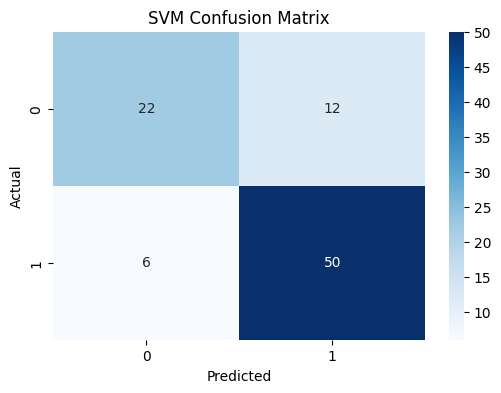

True Positives: 50
True Negatives: 22
False Positives: 6
False Negatives: 12


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_knn)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# NAIVE BAYES TUNING HYPERPARAM

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_model = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_model.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_model.best_params_)
print("Skor terbaik:", sgd_improve_model.best_score_)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.1, 'loss': 'huber', 'max_iter': 900, 'penalty': None}
Skor terbaik: 0.8178723481665761


In [ ]:
mnb = MultinomialNB(alpha = 0.1, force_alpha=True, fit_prior=True)
mnb.fit(X_train,y_train)

MultinomialNB(alpha=0.1, force_alpha=True)

In [ ]:
# get a prediction
y_hat = mnb.predict(X_train)
y_mnb = mnb.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_mnb) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_mnb) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_mnb) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_mnb) * 100)

Training set accuracy:  92.7536231884058
Test set accuracy:  82.6086956521739
Test set f1-score:  84.00000000000001
Test set precision:  80.76923076923077
Test set recall:  87.5


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_mnb))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.81      0.88      0.84        48

    accuracy                           0.83        92
   macro avg       0.83      0.82      0.82        92
weighted avg       0.83      0.83      0.83        92



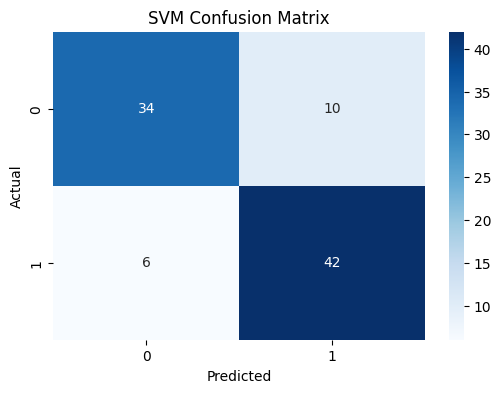

True Positives: 42
True Negatives: 34
False Positives: 6
False Negatives: 10


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_mnb)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

In [ ]:
mnb.fit(X_train, y_train)

Y_pred = mnb.predict(X_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Y_pred : %.2f%%" % (accuracy * 100.0))

Y_pred : 82.61%


# KNN SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# define params for tuning sgd by f1 macro
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_gridSearch.fit(X_sm, y_sm)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 1.0, 'loss': 'squared_hinge', 'max_iter': 400, 'penalty': 'l2'}
Skor terbaik: 81.73529196054223


# KNN ADS

In [ ]:
from imblearn.over_sampling import ADASYN

# Explicitly set the sampling_strategy parameter
ads = ADASYN(sampling_strategy='minority') # or provide a specific ratio

X_ads, y_ads = ads.fit_resample(X, y)

ValueError: No samples will be generated with the provided ratio settings.

In [ ]:
import pandas as pd
pd.Series(y).value_counts()

type of encoding
0    55
1    50
Name: count, dtype: int64

In [ ]:
# define params for tuning sgd by f1 macro
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_gridSearch.fit(X_ads, y_ads)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

NameError: name 'X_ads' is not defined

# KNN TL

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# define params for tuning sgd by f1 macro
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_gridSearch.fit(X_tl, y_tl)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.0001, 'loss': 'squared_hinge', 'max_iter': 400, 'penalty': None}
Skor terbaik: 83.39722503551879


# KNN RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# define params for tuning sgd by f1 macro
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_gridSearch = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_gridSearch.fit(X_rus, y_rus)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_gridSearch.best_params_)
print("Skor terbaik:", sgd_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.001, 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l1'}
Skor terbaik: 86.94526508113465


# Predict Testing

In [ ]:
list_indikator = np.array(data_clean['indikator_stemmed_tokens'])
list_tipe = np.array(data_clean['type of encoding'])

In [ ]:
cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(list_indikator)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
X.shape

(126, 185)

In [ ]:
'''
Dataset baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
result = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
# model.fit(X_train,y_train)
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])


In [ ]:
if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)



menolak nya, karena harus segera dikumpulkan 
The result is :  J


In [ ]:
y_test.value_counts()


In [ ]:
data_clean['Tipe'].value_counts()

# Saving prepro

In [ ]:
# diimport dulu terrr semua depedencies nya terr
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
# prepro depedencies
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# data cleansing
from IPython.utils import text
import string
import re #regex library
# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# model algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# # load data
# data = pd.read_csv('J3.csv')

# # preprocessing the data -> cleanse the data & convert feature dtype as a vector/numbers yagesya biar bisa dipahami sama mesinnya brok.
# data['Indikator'] = data['Indikator'].str.lower()
# pd.DataFrame(data['Indikator'])

# def data_clean(indikator) :
#   #remove tab. new line, and back slice
#   indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
#   #remove non ASCII (emoticon,dll)
#   indikator = indikator.encode('ascii', 'replace').decode('ascii')
#   #remove mention, link, hashtag
#   indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
#   #remove number
#   indikator = re.sub(r"\d+", "", indikator)
#   #remove punctuation
#   indikator = indikator.translate(str.maketrans("","",string.punctuation))
#   #remove whitespace leading & trailing
#   indikator =  indikator.strip()
#   #remove multiple white spacew into single white space
#   indikator = re.sub('\s+', ' ', indikator)
#   #remove single char
#   indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

#   return indikator
# data['Indikator_clean'] = data['Indikator'].apply(data_clean)
#   #NLTK word tokenize
# def word_tokenize_wrapper(indikator) :
#   return word_tokenize(indikator)

# data['Indikator_tokens'] = data['Indikator_clean'].apply(word_tokenize_wrapper)

# normalizad_word = pd.read_csv("normalisasi1.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# data['Indikator_normalized'] = data['Indikator_tokens'].apply(normalized_term)

# stop_list = ["saya","akan","yang","dengan","di","jika"]

# def stopword_removal (indikator):
#   filtering = stop_list
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# data['indikator_filter'] = data['Indikator_normalized'].apply(stopword_removal)

# # Stemming
# def stemming(indikator) :
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []
#   for w in indikator :
#     dt = stemmer.stem(w)
#     do.append(dt)

#   data_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# data['indikator_stemming'] = data['indikator_filter'].apply(stemming)

# #tokenize data stemming - NLTK word tokenize
# def stemmed_tokenizing(indikator) :
#   return word_tokenize(indikator)

# data['indikator_stemmed_tokens'] = data['indikator_stemming'].apply(stemmed_tokenizing)

# data_clean = data.astype({'Tipe' : 'category'})
# data_clean = data.astype({'indikator_stemmed_tokens' : 'string'})

# X = data_clean['indikator_stemmed_tokens']
# y = data_clean['Tipe']

# list_indikator = np.array(X)
# list_tipe = np.array(y)
# enc = LabelEncoder()
# list_tipe = enc.fit_transform(list_tipe)

# # Saving X
# !pip install joblib
# import joblib
# joblib.dump(list_indikator, 'X_J3.sav')

# # Saving y encode
# joblib.dump(list_tipe, 'y_J3.sav')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Saving prepro for testing

In [ ]:
# Load data
dt = pd.read_csv('test_J3.csv')

# casefolding
dt['Indikator'] = dt['Indikator'].str.lower()

# cleansing
def data_clean(indikator) :
  # remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  # remove number
  indikator = re.sub(r"\d+", "", indikator)
  # remove punct
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  # remove whitespace leading & trailing
  indikator = indikator.strip()
  # remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  # remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator

dt['Indikator'] = dt['Indikator'].apply(data_clean)

# Tokenizing
def word_tokenize_wrapper(indikator) :

  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(word_tokenize_wrapper)

# Normalization

normalized_list = pd.read_csv('normalisasi1.csv')
normalized_dict = {}

for index, row in normalized_list.iterrows() :
  if row[0] not in normalized_dict :
    normalized_dict[row[0]] = row[1]

def normalizer(indikator) :
  return [normalized_dict[term] if term in normalized_dict else term for term in indikator]

dt['Indikator'] = dt['Indikator'].apply(normalizer)

# filtering
stop_list = ["saya","akan","yang","dengan","di","jika"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

dt['Indikator'] = dt['Indikator'].apply(stopword_removal)

# Stemming
def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

dt['Indikator'] = dt['Indikator'].apply(stemming)

#tokenize data stemming - NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(stemmed_tokenizing)



tegas bahwa ia salah dan bantu cari solusi
kalau memang dia salah iya tegur itu memang salah dia sendiri dia buat salah arti dia sudah siap konsekuensi
dengar jelas sahabt lebih dahulu dan coba paham situasi tegas bahwa dia telah laku salah dan harus terima konsekuensi namun juga upaya beri solusi baik agar masalah cepat selesai
cari solusi tetapi juga harus tegas bahwa dia terima konsekuensi rebut dan percaya bagai teman harus dukung tetapi juga jujur bantu cari cara baik untuk selesai
upaya cari solusi untuk bantu akrena percaya tiap masalah pasti ada jalan keluar
iya memberitahunya kalau memang itu salah jelas kenapa itu bisa salah dan bantu cari solusi baik kalaupun memang susah dia harus tanggung konsekuensi atas salah sendiri sambil beri dukung dan masuk untuk kedepanny
memberitahu teman untuk terima konsekuensi hal salah apa telah ia laku karena tidak ingin masalah terus lanjut
tegas bahwa ia tetap salah jelas cara halus alas konflik sebut jadi karena salah
bakal bantu meski itu

In [ ]:
dt.to_csv('J3_prepro.csv',index=False)

# eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import joblib
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Load data X and y
X = joblib.load('X_J3.sav')
y = joblib.load('y_J3.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('J3_prepro.csv')
df_test = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_test.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []

# Train the model
X_rus, y_rus = rus.fit_resample(X, y)
model = SGDClassifier(alpha=0.001, loss='squared_hinge', max_iter=100, penalty='l1')
model.fit(X_rus, y_rus)
# Save the model
joblib.dump(model, 'clf_J3.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions
for pred in y_pred:
    if pred == 0:
        result.append('F')
    else:
        result.append('T')

# Display the predictions
for i, res in enumerate(result):
    print(f"{res}")


T
T
T
T
F
F
T
T
T


In [ ]:
pd.DataFrame(label)

,Tipe
0,T
1,T
2,F
3,T
4,F
5,T
6,T
7,T
8,F


In [ ]:
pd.DataFrame(df_test)

,Indikator
0,"['tegas', 'bahwa', 'ia', 'salah', 'dan', 'bant..."
1,"['kalau', 'memang', 'dia', 'salah', 'iya', 'te..."
2,"['dengar', 'jelas', 'sahabt', 'lebih', 'dahulu..."
3,"['cari', 'solusi', 'tetapi', 'juga', 'harus', ..."
4,"['upaya', 'cari', 'solusi', 'untuk', 'bantu', ..."
5,"['iya', 'memberitahunya', 'kalau', 'memang', '..."
6,"['memberitahu', 'teman', 'untuk', 'terima', 'k..."
7,"['tegas', 'bahwa', 'ia', 'tetap', 'salah', 'je..."
8,"['bakal', 'bantu', 'meski', 'itu', 'salah', 'd..."
